 Analyze the Relationship between Population and World Cup Performance

In [21]:
import json
import csv
import pandas as pd

In [22]:
#Open the relevant files
world_cup_file = open("D:/Programming/Datasets/world_cup_2018.json", encoding="utf8")
population_file = open("D:/Programming/Datasets/country_populations.csv")

2018 World Cup Data

In [23]:
#Loading the json world cup file 
world_cup_data = json.load(world_cup_file)

#Closing the file after loading the data
world_cup_file.close()

In [24]:
#Ensuring that the world cup data has the correct data types
assert type(world_cup_data) == dict

# Check that the dictionary has 2 keys, 'name' and 'rounds
assert list(world_cup_data.keys()) == ["name", "rounds"]

Population Data

In [25]:
#loading the csv population file
population_data = []

# Use the csv.DictReader to load the data into a list of dictionaries
csv_reader = csv.DictReader(population_file)

# Iterate through each row and append it to the list
for row in csv_reader:
    population_data.append(dict(row))

#closing the file after loading the data
population_file.close()

In [26]:
# Check that the overall data structure is a list
assert type(population_data) == list


# Check that the 0th element is a dictionary
# (csv.DictReader interface differs slightly by Python version;
# either a dict or an OrderedDict is fine here)

from collections import OrderedDict

assert type(population_data[0]) == dict or type(population_data[0]) == OrderedDict

1. Listing All Teams in the 2018 World Cup

In [27]:
#World cup data keys
world_cup_data.keys()

dict_keys(['name', 'rounds'])

In [28]:
#Identifying the dataset
world_cup_data["name"]

'World Cup 2018'

Extracting Rounds

In [29]:
#Info on the rounds
rounds = world_cup_data["rounds"]

print("type(rounds):", type(rounds))
print("len(rounds):", len(rounds))
print("type(rounds[3])", type(rounds[3]))
print("round[3]:")
rounds[3]

type(rounds): <class 'list'>
len(rounds): 20
type(rounds[3]) <class 'dict'>
round[3]:


{'name': 'Matchday 4',
 'matches': [{'num': 9,
   'date': '2018-06-17',
   'time': '21:00',
   'team1': {'name': 'Brazil', 'code': 'BRA'},
   'team2': {'name': 'Switzerland', 'code': 'SUI'},
   'score1': 1,
   'score2': 1,
   'score1i': 1,
   'score2i': 0,
   'goals1': [{'name': 'Coutinho', 'minute': 20, 'score1': 1, 'score2': 0}],
   'goals2': [{'name': 'Zuber', 'minute': 50, 'score1': 1, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'rostov', 'name': 'Rostov Arena'},
   'city': 'Rostov-on-Don',
   'timezone': 'UTC+3'},
  {'num': 10,
   'date': '2018-06-17',
   'time': '16:00',
   'team1': {'name': 'Costa Rica', 'code': 'CRC'},
   'team2': {'name': 'Serbia', 'code': 'SRB'},
   'score1': 0,
   'score2': 1,
   'score1i': 0,
   'score2i': 0,
   'goals1': [],
   'goals2': [{'name': 'Kolarov', 'minute': 56, 'score1': 0, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'samara', 'name': 'Samara Arena'},
   'city': 'Samara',
   'timezone': 'UTC+4'},
  {'num': 11,
   

Extracting Matches

In [30]:
matches = []

for round_ in rounds:
    #Extracting the list of matches for this round
    round_matches = round_["matches"]
    #Adding to the overall list of matches
    matches.extend(round_matches)

#accessing the first match in the list
matches[0]

{'num': 1,
 'date': '2018-06-14',
 'time': '18:00',
 'team1': {'name': 'Russia', 'code': 'RUS'},
 'team2': {'name': 'Saudi Arabia', 'code': 'KSA'},
 'score1': 5,
 'score2': 0,
 'score1i': 2,
 'score2i': 0,
 'goals1': [{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0},
  {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0},
  {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}],
 'goals2': [],
 'group': 'Group A',
 'stadium': {'key': 'luzhniki', 'name': 'Luzhniki Stadium'},
 'city': 'Moscow',
 'timezone': 'UTC+3'}

In [31]:

# There should be 64 matches. If the length is 20, that means
# you have a list of lists instead of a list of dictionaries
assert len(matches) == 64

# Each match in the list should be a dictionary
assert type(matches[0]) == dict

Extracting Teams

In [32]:
print(matches[0]["team1"])
print(matches[0]["team2"])

{'name': 'Russia', 'code': 'RUS'}
{'name': 'Saudi Arabia', 'code': 'KSA'}


In [33]:
#Creating a list of unique team names
teams_set = set()

for match in matches:
    #Add team1 value to team_set
    teams_set.add(match["team1"]["name"])
    #Add team2 value to team_set
    teams_set.add(match["team2"]["name"])

teams = sorted(list(teams_set))
print(teams)

['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France', 'Germany', 'Iceland', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Uruguay']


In [34]:
#teams should be a list not a set
assert type(teams) == list

#32 teams competed in the 2018 world cup
assert len(teams) == 32

#each element of list should be a string
assert type(teams[0]) == str

2. Associating Countries with 2018 World Cup Performance

In [35]:
#creating a dict combined data
combined_data = {team: {"wins":0} for team in teams}


In [36]:
# Run this cell without change

# combined_data should be a dictionary
assert type(combined_data) == dict

# the keys should be strings
assert type(list(combined_data.keys())[0]) == str

# the values should be dictionaries
assert combined_data["Japan"] == {"wins": 0}

In [38]:
#Writing a function to find winner
def find_winner(match):
    if match["score1"] > match["score2"]:
        return match["team1"]["name"]
    elif match["score2"] > match["score1"]:
        return match["team2"]["name"]
    else:
        return None

In [39]:
assert find_winner(matches[0]) == "Russia"
assert find_winner(matches[1]) == "Uruguay"
assert find_winner(matches[2]) == None

In [40]:
for match in matches:
    winner = find_winner(match)
    if winner:
        combined_data[winner]["wins"] +=1

# Visually inspect the output to ensure the wins are
# different for different countries
combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

Statistical Summary of Wins

In [41]:
import numpy as np

wins = [val["wins"] for val in combined_data.values()]

print("Mean number of wins:", np.mean(wins))
print("Median number of wins:", np.median(wins))
print("Standard deviation of number of wins:", np.std(wins))

Mean number of wins: 1.5625
Median number of wins: 1.0
Standard deviation of number of wins: 1.5194057226429023


Visualizing of wins

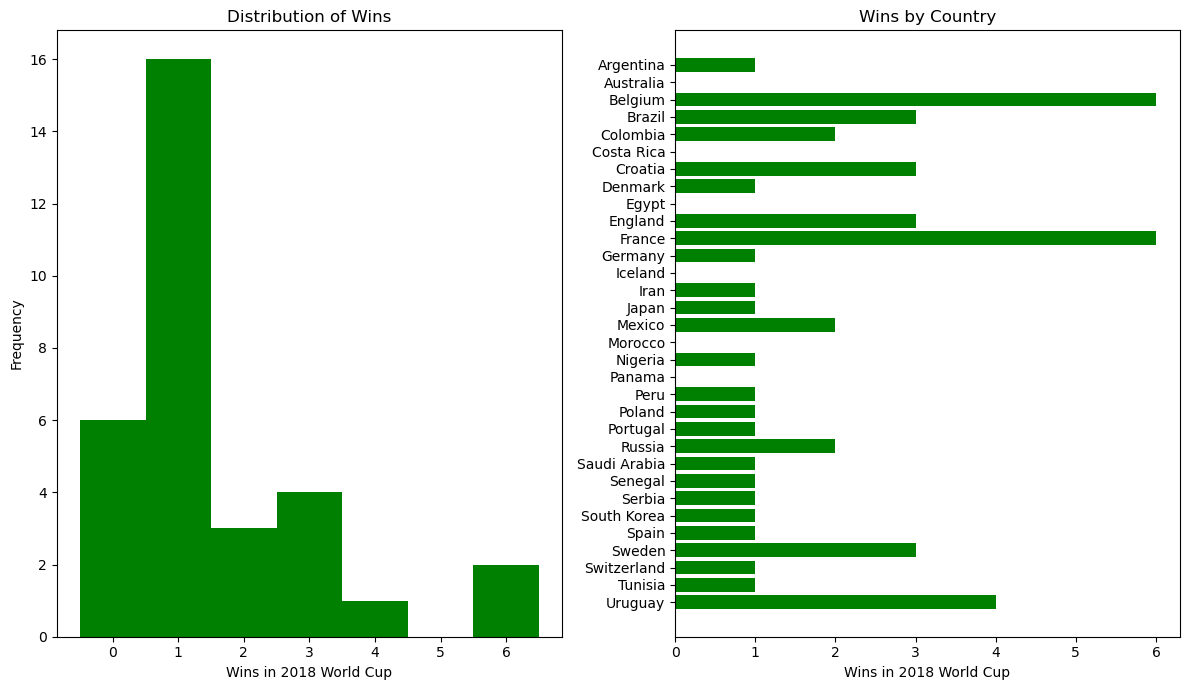

In [42]:
import matplotlib.pyplot as plt

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Wins and Frequencies
ax1.hist(x=wins, bins=range(8), align="left", color="green")
ax1.set_xticks(range(7))
ax1.set_xlabel("Wins in 2018 World Cup")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Wins")

# Horizontal Bar Graph of Wins by Country
ax2.barh(teams[::-1], wins[::-1], color="green")
ax2.set_xlabel("Wins in 2018 World Cup")
ax2.set_title("Wins by Country");

Exploring the Structure of the Population Data CSV

In [43]:
len(population_data)

12695

In [44]:
#Sample of the population data
np.random.seed(42)
population_record_sample = np.random.choice(population_data, 10)
population_record_sample

array([{'': '9984', 'Country Name': 'Malta', 'Country Code': 'MLT', 'Year': '1983', 'Value': '330524'},
       {'': '3574', 'Country Name': 'Bahrain', 'Country Code': 'BHR', 'Year': '1994', 'Value': '549583'},
       {'': '8104', 'Country Name': 'Iran, Islamic Rep.', 'Country Code': 'IRN', 'Year': '1988', 'Value': '53077313'},
       {'': '7905', 'Country Name': 'Iceland', 'Country Code': 'ISL', 'Year': '1966', 'Value': '195570'},
       {'': '14678', 'Country Name': 'United Arab Emirates', 'Country Code': 'ARE', 'Year': '1966', 'Value': '159976'},
       {'': '13998', 'Country Name': 'Thailand', 'Country Code': 'THA', 'Year': '1994', 'Value': '58875269'},
       {'': '8448', 'Country Name': 'Jamaica', 'Country Code': 'JAM', 'Year': '1978', 'Value': '2105907'},
       {'': '8979', 'Country Name': 'Kuwait', 'Country Code': 'KWT', 'Year': '1978', 'Value': '1224067'},
       {'': '3180', 'Country Name': 'Argentina', 'Country Code': 'ARG', 'Year': '2013', 'Value': '42202935'},
       {'': 

In [46]:
#Filtering the population data
population_data_filtered = []

for record in population_data:
    if record["Country Name"] in teams and record["Year"] == "2018":
        population_data_filtered.append(record)

len(population_data_filtered)

27

In [47]:
#why 27 and not 32, taking a look at the population data sample
population_record_sample[2]

{'': '8104',
 'Country Name': 'Iran, Islamic Rep.',
 'Country Code': 'IRN',
 'Year': '1988',
 'Value': '53077313'}

In [48]:
#comparing with the value of Iran in teams
teams[13]

'Iran'

Normalizing Locations in Population Data

In [49]:
def normalize_location(country_name):
    """
    Given a country name, return the name that the
    country uses when playing in the FIFA World Cup
    """
    name_sub_dict = {
        "Russian Federation": "Russia",
        "Egypt, Arab Rep.": "Egypt",
        "Iran, Islamic Rep.": "Iran",
        "Korea, Rep.": "South Korea",
        "United Kingdom": "England",
    }
    # The .get method returns the corresponding value from
    # the dict if present, otherwise returns country_name
    return name_sub_dict.get(country_name, country_name)


# Example where normalized location is different
print(normalize_location("Russian Federation"))
# Example where normalized location is the same
print(normalize_location("Argentina"))

Russia
Argentina


In [51]:
population_data_filtered = []

for record in population_data:
    normalized_country = normalize_location(record["Country Name"])
    if normalized_country in teams and record["Year"] == "2018":
        record["Country Name"] = normalized_country
        population_data_filtered.append(record)

print(len(population_data_filtered))

32


Type Conversion of Population Data

In [52]:
population_data_filtered[0]

{'': '3185',
 'Country Name': 'Argentina',
 'Country Code': 'ARG',
 'Year': '2018',
 'Value': '44494502'}

In [54]:
#Converting the population value from string to integer
for record in population_data_filtered:
    record["Value"] = int(record["Value"])

# Look at the last record to make sure the population
# value is an int
population_data_filtered[-1]

{'': '14907',
 'Country Name': 'Uruguay',
 'Country Code': 'URY',
 'Year': '2018',
 'Value': 3449299}

In [55]:
assert type(population_data_filtered[-1]["Value"]) == int

In [56]:
#View of combined data
combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

In [59]:
for record in population_data_filtered:
    # Extract the country name from the record
    country = record["Country Name"]
    # Extract the population value from the record
    population = record["Value"]
    # Add this information to combined_data
    if country in combined_data:
        combined_data[country]["population"] = population

# Look combined_data
combined_data

{'Argentina': {'wins': 1, 'population': 44494502},
 'Australia': {'wins': 0, 'population': 24982688},
 'Belgium': {'wins': 6, 'population': 11433256},
 'Brazil': {'wins': 3, 'population': 209469333},
 'Colombia': {'wins': 2, 'population': 49648685},
 'Costa Rica': {'wins': 0, 'population': 4999441},
 'Croatia': {'wins': 3, 'population': 4087843},
 'Denmark': {'wins': 1, 'population': 5793636},
 'Egypt': {'wins': 0, 'population': 98423595},
 'England': {'wins': 3, 'population': 66460344},
 'France': {'wins': 6, 'population': 66977107},
 'Germany': {'wins': 1, 'population': 82905782},
 'Iceland': {'wins': 0, 'population': 352721},
 'Iran': {'wins': 1, 'population': 81800269},
 'Japan': {'wins': 1, 'population': 126529100},
 'Mexico': {'wins': 2, 'population': 126190788},
 'Morocco': {'wins': 0, 'population': 36029138},
 'Nigeria': {'wins': 1, 'population': 195874740},
 'Panama': {'wins': 0, 'population': 4176873},
 'Peru': {'wins': 1, 'population': 31989256},
 'Poland': {'wins': 1, 'popu

In [64]:
assert type(combined_data["Uruguay"]) == dict
assert type(combined_data["Uruguay"]["population"]) == int

4. Analysis of Population vs. Performance

In [68]:
# Extracting wins and population from combined_data
wins = []
population = []

for country, data in combined_data.items():
    if 'wins' in data and 'population' in data:
        wins.append(data['wins'])
        population.append(data['population'])

# Now compute the correlation coefficient
np.corrcoef(wins, population)[0][1]


0.07592816849178587

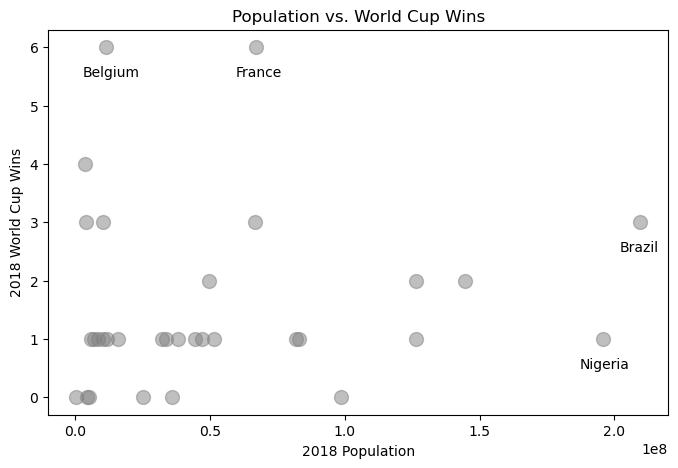

In [71]:

# Set up figure
fig, ax = plt.subplots(figsize=(8, 5))

# Basic scatter plot
ax.scatter(x=population, y=wins, color="gray", alpha=0.5, s=100)
ax.set_xlabel("2018 Population")
ax.set_ylabel("2018 World Cup Wins")
ax.set_title("Population vs. World Cup Wins")

# Add annotations for specific points of interest
highlighted_points = {
    "Belgium": 2,  # Numbers are the index of that
    "Brazil": 3,  # country in populations & wins
    "France": 10,
    "Nigeria": 17,
}
for country, index in highlighted_points.items():
    # Get x and y position of data point
    x = population[index]
    y = wins[index]
    # Move each point slightly down and to the left
    # (numbers were chosen by manually tweaking)
    xtext = x - (1.25e6 * len(country))
    ytext = y - 0.5
    # Annotate with relevant arguments
    ax.annotate(text=country, xy=(x, y), xytext=(xtext, ytext))